In [7]:
%load_ext autoreload

%autoreload 2

In [8]:
from deep_dss.utils import *
from deep_dss.models import *

from deepsphere.plot import plot_loss

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]

def plot_metrics_axes(ax, loss_training, loss_validation, eval_frequency, t_step, target=0.04, title=""):
    x_steps = np.array([eval_frequency*i for i in range(len(loss_training))])
    ax2 = ax.secondary_xaxis('top', functions=(lambda x : t_step * x / 3600, lambda x: x * 3600 / t_step))
    ax2.set_xlabel("Training Time (hrs)")
    ax.set_yscale("log")
    ax.plot(x_steps, loss_training, '.-', label='training')
    ax.plot(x_steps, loss_validation, '.-', label='validation')
    ax.plot([0, np.max(x_steps)], [target, target], label='target')
    ax.set_xlim([0, np.max(x_steps)])
    ax.set_ylim([1e-2, 10])
    ax.set_yticks([1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 2, 5, 10])
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xlabel("Training Step")
    ax.set_ylabel("Average L1 Loss")
    ax.set_title(title)
    ax.grid()
    ax.legend()
    
def plot_metrics(exp_name, order=2, nmaps=10, batch_size=16):
    path_1 = np.load("../metrics/vdata1-{}-metrics-1.npz".format(exp_name))
    path_2 = np.load("../metrics/vdata1-{}-metrics-2.npz".format(exp_name))
    eval_frequency = 12*order*order*nmaps/batch_size
    t_step = path_1["t"]
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0] = plot_metrics_axes(axs[0], path_1["ltrain"], path_1["lval"], eval_frequency, t_step,
                              title="Training Metrics for {} on Noiseless Data".format(exp_name))
    axs[1] = plot_metrics_axes(axs[1], path_2["ltrain"], path_2["lval"], eval_frequency, t_step,  
                               title="Training Metrics for {} on Noisy Data".format(exp_name))
    print("Minimum Loss on Training Set During Noiseless Stage: {}".format(np.min(path_1["ltrain"])))
    print("Minimum Loss on Validation Set During Noiseless Stage: {}".format(np.min(path_1["lval"])))
    print("Minimum Loss on Training Set During Noisy Stage: {}".format(np.min(path_2["ltrain"])))
    print("Minimum Loss on Validation Set During Noisy Stage: {}".format(np.min(path_2["lval"])))
    print("Time per Training Step During Noiseless Stage: {} seconds".format(path_1["t"]))
    print("Time per Training Step During Noisy Stage: {} seconds".format(path_2["t"]))

Minimum Loss on Training Set During Noiseless Stage: 0.011647474020719528
Minimum Loss on Validation Set During Noiseless Stage: 0.024398157373070717
Minimum Loss on Training Set During Noisy Stage: 0.007418647408485413
Minimum Loss on Validation Set During Noisy Stage: 0.07254222594201565
Time per Training Step During Noiseless Stage: 43.95382819573084 seconds
Time per Training Step During Noisy Stage: 44.279929091268116 seconds


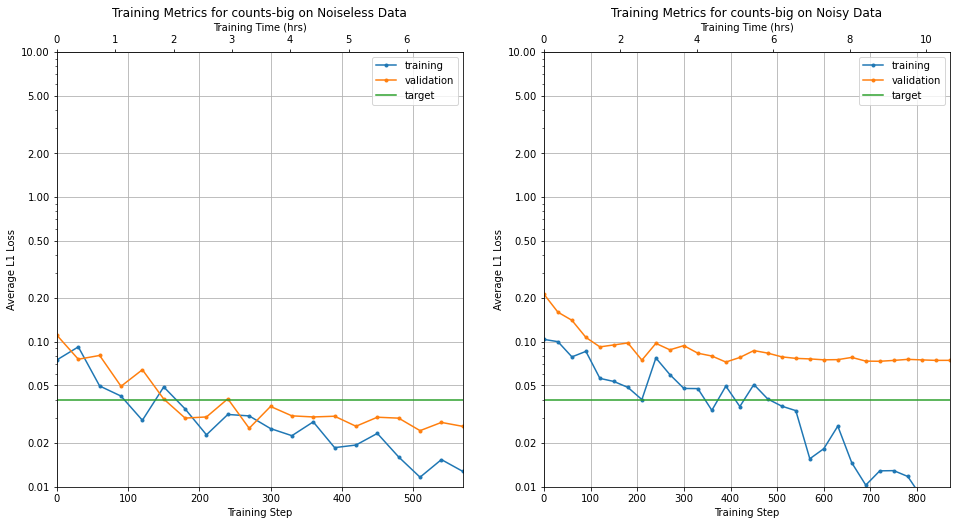

In [3]:
plot_metrics("counts-big")

Minimum Loss on Training Set During Noiseless Stage: 0.021325547248125076
Minimum Loss on Validation Set During Noiseless Stage: 5.399387836456299
Minimum Loss on Training Set During Noisy Stage: 0.05529889464378357
Minimum Loss on Validation Set During Noisy Stage: 0.18968240916728973
Time per Training Step During Noiseless Stage: 45.238330533107124 seconds
Time per Training Step During Noisy Stage: 47.21277985652288 seconds


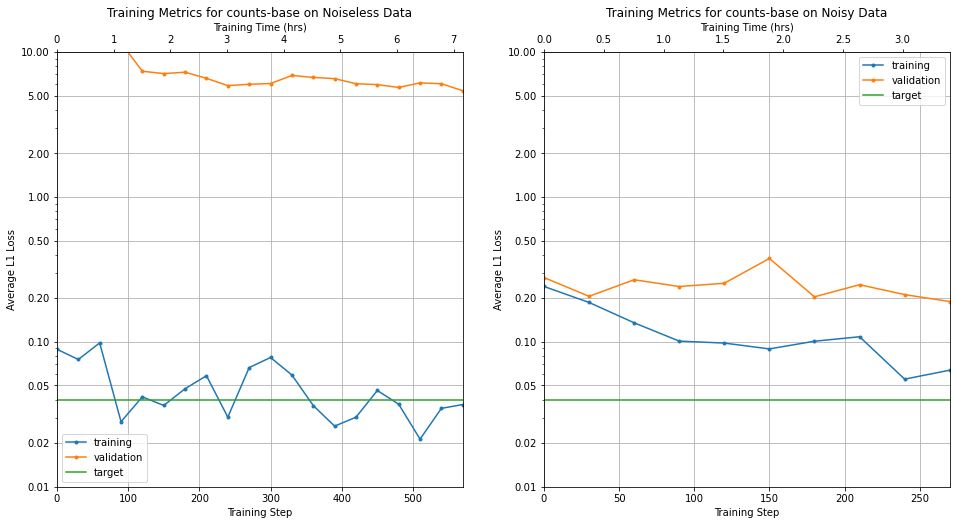

In [222]:
plot_metrics("counts-base")

Minimum Loss on Training Set During Noiseless Stage: 0.033966004848480225
Minimum Loss on Validation Set During Noiseless Stage: 0.40057724714279175
Minimum Loss on Training Set During Noisy Stage: 0.07441901415586472
Minimum Loss on Validation Set During Noisy Stage: 0.3225913941860199
Time per Training Step During Noiseless Stage: 58.67771373589834 seconds
Time per Training Step During Noisy Stage: 58.950272799332936 seconds


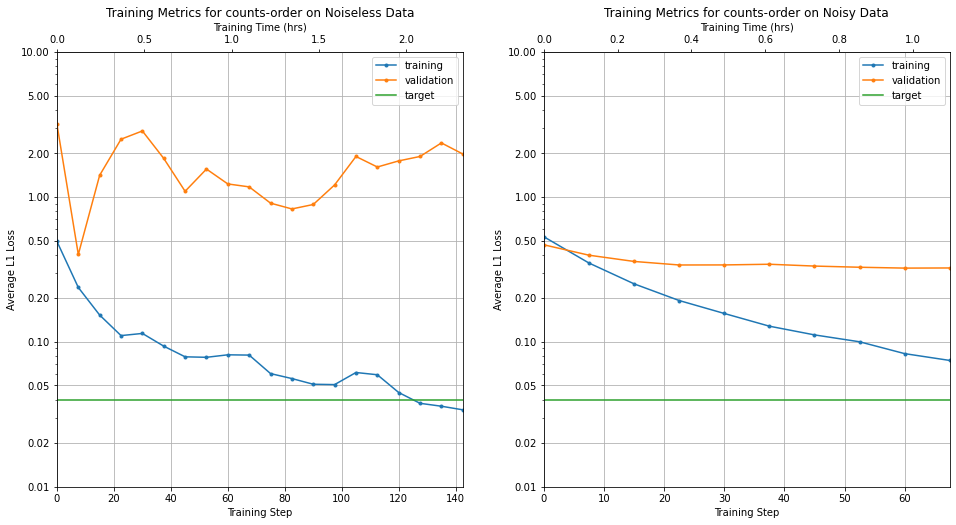

In [223]:
plot_metrics("counts-order", batch_size=64)

Minimum Loss on Training Set During Noiseless Stage: 0.027557533234357834
Minimum Loss on Validation Set During Noiseless Stage: 0.9494761228561401
Minimum Loss on Training Set During Noisy Stage: 0.16173219680786133
Minimum Loss on Validation Set During Noisy Stage: 0.27226418256759644
Time per Training Step During Noiseless Stage: 117.72580691258112 seconds
Time per Training Step During Noisy Stage: 116.49865822950999 seconds


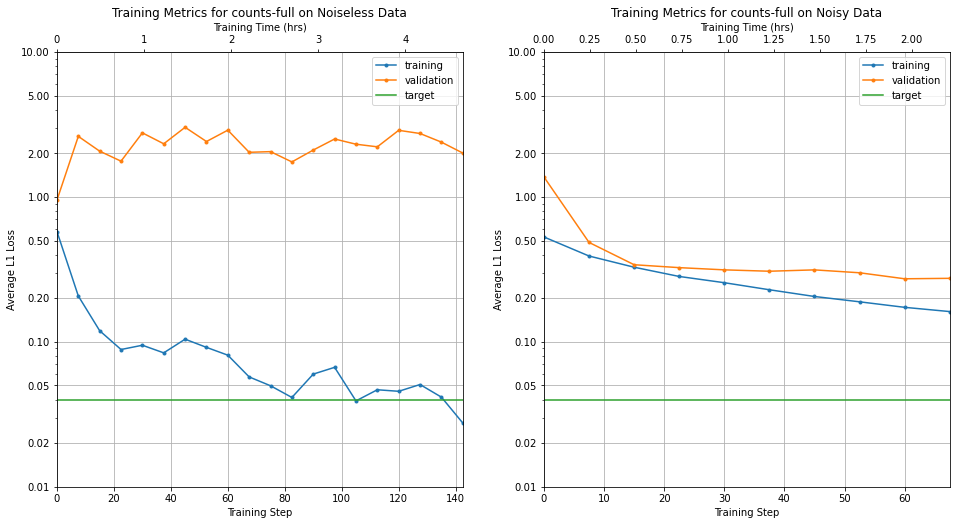

In [224]:
plot_metrics("counts-full", batch_size=64)

Minimum Loss on Training Set During Noiseless Stage: 0.03253520280122757
Minimum Loss on Validation Set During Noiseless Stage: 0.18191348016262054
Minimum Loss on Training Set During Noisy Stage: 0.0416327528655529
Minimum Loss on Validation Set During Noisy Stage: 0.13029903545975685
Time per Training Step During Noiseless Stage: 46.402980461915334 seconds
Time per Training Step During Noisy Stage: 47.513112494150796 seconds


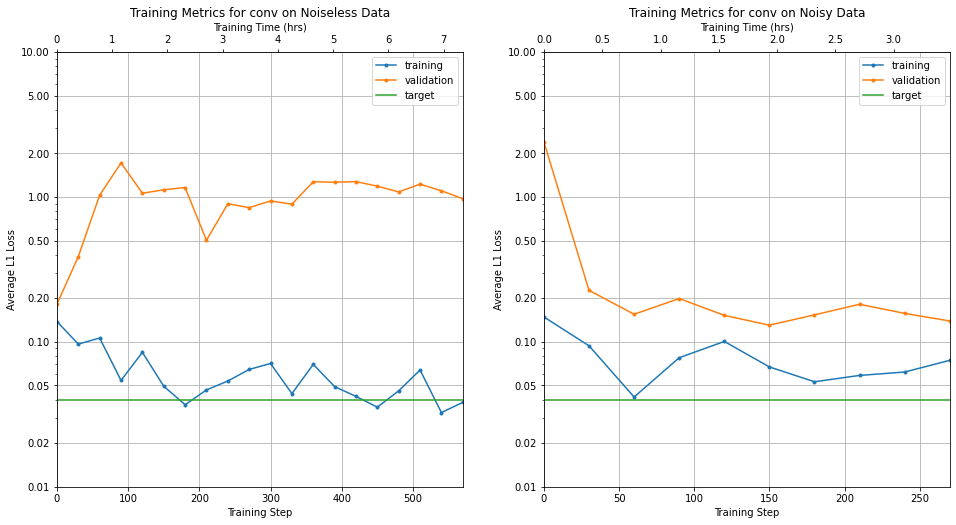

In [225]:
plot_metrics("conv")

Minimum Loss on Training Set During Noiseless Stage: 0.02568395435810089
Minimum Loss on Validation Set During Noiseless Stage: 0.1842850185930729
Minimum Loss on Training Set During Noisy Stage: 0.04328007251024246
Minimum Loss on Validation Set During Noisy Stage: 0.15347876772284508
Time per Training Step During Noiseless Stage: 47.318723888397216 seconds
Time per Training Step During Noisy Stage: 47.51106190284093 seconds


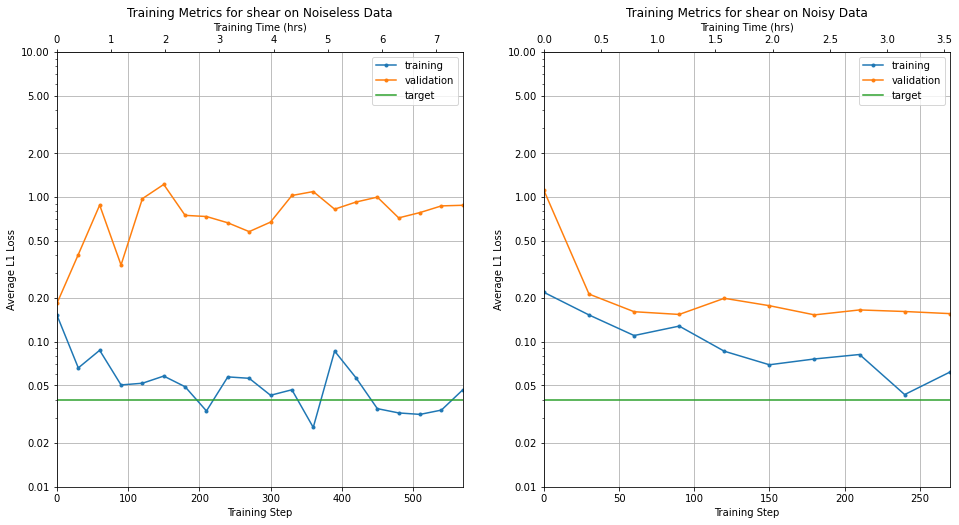

In [226]:
plot_metrics("shear")

Minimum Loss on Training Set During Noiseless Stage: 0.020190514624118805
Minimum Loss on Validation Set During Noiseless Stage: 2.101491391658783
Minimum Loss on Training Set During Noisy Stage: 0.0430864542722702
Minimum Loss on Validation Set During Noisy Stage: 0.18612020835280418
Time per Training Step During Noiseless Stage: 44.99229112704595 seconds
Time per Training Step During Noisy Stage: 44.3794251592954 seconds


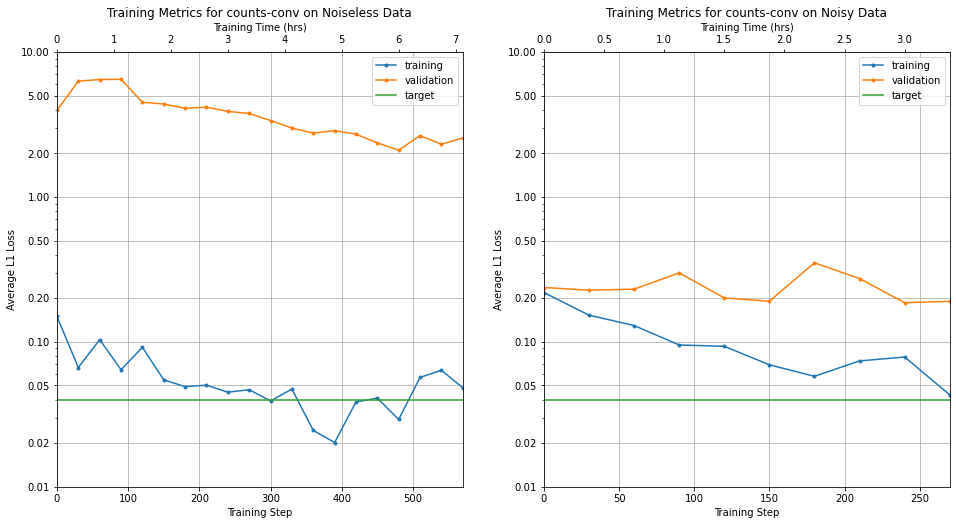

In [227]:
plot_metrics("counts-conv")

In [3]:
def total_channels(c):
    if c[0] == "c":
        return 1 + lensing_channels(c[1:])
    return lensing_channels(c)


config = "ck"
channels = total_channels(config)
order = 2
nmaps = 20
k = 64
epochs1 = 20
epochs2 = 30
lr1 = 1e-4
lr2 = 1e-4

In [18]:
model = model_by_architecture("data1", num_epochs=1, learning_rate=1e-4, input_channels=channels, nmaps=45,
                                  order=order, exp_name="final2-noisy-lowlr", nfilters=k)

#sides: [1024, 512, 256, 128, 64, 32, 16, 8, 4]
#pixels: [262144, 65536, 16384, 4096, 1024, 256, 64, 16, 4]
#samples per batch: 16
=> #pixels per batch (input): 4,194,304
=> #pixels for training (input): 566,231,040
NN architecture
  input: M_0 = 262144
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 262144 * 64 / 4 = 4194304
    weights: F_0 * F_1 * K_1 = 2 * 64 * 5 = 640
    biases: F_1 = 64
    batch normalization
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 65536 * 64 / 4 = 1048576
    weights: F_1 * F_2 * K_2 = 64 * 64 * 5 = 20480
    biases: F_2 = 64
    batch normalization
  layer 3: cgconv3
    representation: M_2 * F_3 / p_3 = 16384 * 64 / 4 = 262144
    weights: F_2 * F_3 * K_3 = 64 * 64 * 5 = 20480
    biases: F_3 = 64
    batch normalization
  layer 4: cgconv4
    representation: M_3 * F_4 / p_4 = 4096 * 64 / 4 = 65536
    weights: F_3 * F_4 * K_4 = 64 * 64 * 5 = 20480
    biases: F_4 = 64
    batch normalization
  layer 5: cgconv5
    representation: M

In [21]:
test_dict = split_count_and_lensing_maps_by_dataset("TEST", config=config, order=order)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = NESTED in fits f

In [22]:
pred_test = model.predict(test_dict["x"])

/Users/adiraju/deep_dss/checkpoints/flaskv2-vdata1-final2-noisy-lowlr
INFO:tensorflow:Restoring parameters from /Users/adiraju/deep_dss/checkpoints/flaskv2-vdata1-final2-noisy-lowlr/model-90


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [10,64] rhs shape= [5,64]
	 [[Node: save/Assign_6 = Assign[T=DT_FLOAT, _class=["loc:@conv1/weights"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv1/weights/Adam, save/RestoreV2:6)]]

Caused by op 'save/Assign_6', defined at:
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/asyncio/base_events.py", line 442, in run_forever
    self._run_once()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/asyncio/base_events.py", line 1462, in _run_once
    handle._run()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-05ec34bcb0bb>", line 2, in <module>
    order=order, exp_name="final2-noisy-lowlr", nfilters=k)
  File "/Users/adiraju/.local/lib/python3.6/site-packages/deep_dss-0.1.0-py3.6.egg/deep_dss/models.py", line 522, in model_by_architecture
    exp_name=exp_name, nfilters=nfilters, batch_size=batch_size))
  File "/Users/adiraju/.local/lib/python3.6/site-packages/deepsphere-0.1.0-py3.6.egg/deepsphere/models.py", line 1221, in __init__
    super(deepsphere, self).__init__(L=L, p=p, **kwargs)
  File "/Users/adiraju/.local/lib/python3.6/site-packages/deepsphere-0.1.0-py3.6.egg/deepsphere/models.py", line 562, in __init__
    self.build_graph(M_0)
  File "/Users/adiraju/.local/lib/python3.6/site-packages/deepsphere-0.1.0-py3.6.egg/deepsphere/models.py", line 280, in build_graph
    self.op_saver = tf.train.Saver(max_to_keep=5)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1284, in __init__
    self.build()
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 781, in _build_internal
    restore_sequentially, reshape)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 422, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 113, in restore
    self.op.get_shape().is_fully_defined())
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 219, in assign
    validate_shape=validate_shape)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 60, in assign
    use_locking=use_locking, name=name)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/Users/adiraju/opt/anaconda3/envs/deepsphere-gpu/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [10,64] rhs shape= [5,64]
	 [[Node: save/Assign_6 = Assign[T=DT_FLOAT, _class=["loc:@conv1/weights"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv1/weights/Adam, save/RestoreV2:6)]]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(y_train1[:, 0], pred_train1[:, 0], 'bo', label='train q1')
# ax.plot(y_train2[:, 0], pred_train2[:, 0], 'ro', label='train q2')
# ax.plot(y_train3[:, 0], pred_train3[:, 0], 'go', label='train q3')
# ax.plot(y_train4[:, 0], pred_train4[:, 0], 'yo', label='train q4')
ax.plot(test_dict["y"][:, 0], pred_test[:, 0], 'ko', label='test')
ax.plot([0.5, 1.2], [0.5, 1.2], linewidth=4, label='ground truth')
linreg = np.polyfit(test_dict["y"][:,0], pred_test[:,0], 1)
p = np.poly1d(linreg)
ax.plot(test_dict["y"][:,0], p(test_dict["y"][:,0]), linewidth=4, label='linear fit')
ax.set_xlabel('Ground truth value of $\sigma_8$', fontsize=18)
ax.set_ylabel('Predicted value of $\sigma_8$', fontsize=18)
ax.set_title('"Winning Model" prediction of parameter {}'.format("$\sigma_8$"), fontsize=18)
ax.legend()

linreg